In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/archive (5)/Trojan_Detection.csv")
df.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,73217,10.42.0.42-121.14.255.84-49975-80-6,10.42.0.42,49975,121.14.255.84,80,6,17/07/2017 01:18:33,10743584,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
1,72089,172.217.6.226-10.42.0.42-443-49169-17,10.42.0.42,49169,172.217.6.226,443,17,17/07/2017 10:25:25,254217,6,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
2,96676,10.42.0.1-10.42.0.42-53-37749-17,10.42.0.42,37749,10.42.0.1,53,17,30/06/2017 07:16:12,1023244,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,42891,10.42.0.1-10.42.0.42-53-41352-17,10.42.0.42,41352,10.42.0.1,53,17,13/07/2017 03:48:44,286483,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
4,169326,10.42.0.151-107.22.241.77-44353-443-6,10.42.0.151,44353,107.22.241.77,443,6,05/07/2017 10:47:35,65633087,12,...,32,322594.0,0.0,322594.0,322594.0,60306983.0,0.0,60306983.0,60306983.0,Benign


In [ ]:
df = df.dropna()

# df.drop(["Unnamed: 0"], axis = 1,inplace=True)

df = df.replace("Trojan", 1)
df = df.replace("Benign", 0)

df.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,73217,10.42.0.42-121.14.255.84-49975-80-6,10.42.0.42,49975,121.14.255.84,80,6,17/07/2017 01:18:33,10743584,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,72089,172.217.6.226-10.42.0.42-443-49169-17,10.42.0.42,49169,172.217.6.226,443,17,17/07/2017 10:25:25,254217,6,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,96676,10.42.0.1-10.42.0.42-53-37749-17,10.42.0.42,37749,10.42.0.1,53,17,30/06/2017 07:16:12,1023244,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,42891,10.42.0.1-10.42.0.42-53-41352-17,10.42.0.42,41352,10.42.0.1,53,17,13/07/2017 03:48:44,286483,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,169326,10.42.0.151-107.22.241.77-44353-443-6,10.42.0.151,44353,107.22.241.77,443,6,05/07/2017 10:47:35,65633087,12,...,32,322594.0,0.0,322594.0,322594.0,60306983.0,0.0,60306983.0,60306983.0,0


In [ ]:
df.columns

Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

In [ ]:
from sklearn import preprocessing

number = preprocessing.LabelEncoder()

df["Flow ID"] = number.fit_transform(df["Flow ID"])
df[" Source IP"] = number.fit_transform(df[" Source IP"])
df[" Destination IP"] = number.fit_transform(df[" Destination IP"])
df[" Timestamp"] = number.fit_transform(df[" Timestamp"])

df.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,73217,46111,7,49975,352,80,6,36269,10743584,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,72089,74905,7,49169,895,443,17,39241,254217,6,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,96676,9217,7,37749,7,53,17,42069,1023244,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,42891,10418,7,41352,7,53,17,29885,286483,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,169326,20763,5,44353,220,443,6,16589,65633087,12,...,32,322594.0,0.0,322594.0,322594.0,60306983.0,0.0,60306983.0,60306983.0,0


In [ ]:
from sklearn.model_selection import train_test_split

# Columns used as predictors
X = df.drop(["Class"], axis = 1).values

y = df["Class"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [ ]:
# from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [ ]:
#Scale data, otherwise model will fail.
#Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:

# define the model
#Experiment with deeper and wider networks
model = Sequential()

model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))

#Output layer
model.add(Dense(1, activation='relu'))


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               11008     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 27,649
Trainable params: 27,649
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs =30)


Epoch 1/30
3550/3550 [==============================] - 12s 3ms/step - loss: 0.5937 - accuracy: 0.9434 - val_loss: 0.5346 - val_accuracy: 0.9599
Epoch 2/30
3550/3550 [==============================] - 11s 3ms/step - loss: 0.2783 - accuracy: 0.9725 - val_loss: 0.1563 - val_accuracy: 0.9877
Epoch 3/30
3550/3550 [==============================] - 9s 3ms/step - loss: 0.2616 - accuracy: 0.9791 - val_loss: 0.4660 - val_accuracy: 0.9671
Epoch 4/30
3550/3550 [==============================] - 11s 3ms/step - loss: 0.3961 - accuracy: 0.9714 - val_loss: 0.1422 - val_accuracy: 0.9894
Epoch 5/30
3550/3550 [==============================] - 12s 3ms/step - loss: 0.3687 - accuracy: 0.9747 - val_loss: 0.5822 - val_accuracy: 0.9605
Epoch 6/30
3550/3550 [==============================] - 10s 3ms/step - loss: 0.3937 - accuracy: 0.9738 - val_loss: 0.5128 - val_accuracy: 0.9657
Epoch 7/30
3550/3550 [==============================] - 9s 3ms/step - loss: 0.5840 - accuracy: 0.9616 - val_loss: 0.6017 - val_accu

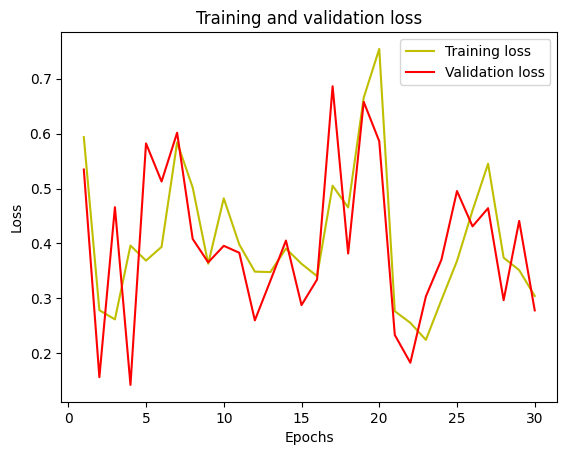

In [ ]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_test

array([1, 0, 1, ..., 1, 0, 1])

In [ ]:
model.predict(X_test_scaled)

1110/1110 [==============================] - 2s 1ms/step


array([[1973.5133],
       [   0.    ],
       [1839.5597],
       ...,
       [ 775.4674],
       [   0.    ],
       [1295.4906]], dtype=float32)

In [ ]:
predictions = model.predict(X_test_scaled)


1110/1110 [==============================] - 2s 1ms/step


In [ ]:
(predictions > 0.5).astype(int)

array([[1],
       [0],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,(predictions.flatten() > 0.5).astype(int))

0.9910980900332413